In [1]:
!pip install opencv-python
!pip install opencv-contrib-python==3.4.2.17
!pip install keras
!pip install numpy
!pip install pillow
!pip install scipy
!pip install h5py
!pip install matplotlib
!pip install gtts
!pip install gluoncv
!pip install mxnet-cu100mkl --pre

In [2]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio, display #Import Audio method from IPython's Display Class
%matplotlib inline
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import mxnet as mx
from imutils import paths
import numpy as np
import imutils
import cv2
from IPython.display import Image
import time
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from math import sin, cos, sqrt, atan2, radians

Populating the interactive namespace from numpy and matplotlib


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
cd /content/drive/My Drive/IITKGP/ImageAI-master/

/content/drive/My Drive/IITKGP/ImageAI-master


In [6]:
net = model_zoo.get_model('ssd_512_resnet50_v1_coco', pretrained=True)

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1328: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Model file is not found. Downloading.


181189KB [00:05, 34242.20KB/s]                            


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      //await sleep(2000);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
# # Clicking reference image
# try:
#   filename = take_photo('reference.jpg')
#   print('Saved to {}'.format(filename))
  
#   # Show the image which was just taken.
#   display(Image(filename))
# except Exception as err:
#   # Errors will be thrown if the user does not have a webcam or if they do not
#   # grant the page permission to access it.
#   print(str(err))

In [0]:
# initialize the known distance from the camera to the object, which
# in this case is 24 inches
# change the known distance accordingly
KNOWN_DISTANCE = 54.0

# initialize the known object width, which in this case, the piece of
# paper is 12 inches wide

KNOWN_WIDTH = { 'person' : 16.0,
                'bicycle' : 30.0,
                'car' : 72.0,
                'motorcycle' : 30.0,
                'airplane' : 2700.0,
                'bus' : 100.0 ,
                'train' : 120.0,
                'truck' : 110.0,
                'boat' : 96.0,
                'traffic light' : 13.5,
                'fire hydrant' : 15.0,
                'stop sign' : 30.0,
                'parking meter' : 108.0,
                'bench' : 50.0,
                'bird' : 20.0,
                'cat' : 9.0,
                'dog' : 14.0,
                'horse' : 62.0,
                'sheep' : 36.0,
                'cow' : 25.0,
                'elephant' : 120.0,
                'bear' : 40.0,
                'zebra' : 24.0,
                'giraffe' : 50.0,
                'backpack' : 22.0,
                'umbrella' : 30.0,
                'handbag' : 20.0,
                'tie' : 2.0,
                'suitcase' : 26.0,
                'frisbee' : 12.0,
                'skis' : 5.0,
                'snowboard' : 10.0,
                'sports ball' : 10.0,
                'kite' : 16.0,
                'baseball bat' : 6.0,
                'baseball glove' : 8.0,
                'skateboard' : 10.0,
                'surfboard' : 20.0,
                'tennis racket' : 14.0,
                'bottle' : 3.0,
                'wine glass' : 3.0,
                'cup' : 3.0,
                'fork' : 1.0,
                'knife' : 1.0,
                'spoon' : 1.0,
                'bowl' : 9.0,
                'banana' : 2.0,
                'apple' : 4.0,
                'sandwich' : 6.0,
                'orange' : 4.0,
                'broccoli' : 10.0,
                'carrot' : 2.0,
                'hot dog' : 3.0,
                'pizza' : 12.0,
                'donut' : 5.0,
                'cake' : 10.0,
                'chair' : 24.0,
                'couch' : 60.0,
                'potted plant' : 9.0,
                'bed' : 70.0,
                'dining table' : 40.0,
                'toilet' : 20.0,
                'tv' : 43.0,
                'laptop' : 17.0,
                'mouse' : 3.0,
                'remote' : 3.0,
                'keyboard' : 6.0,
                'cell phone' : 5.0,
                'microwave' : 40.0,
                'oven' : 40.0,
                'toaster' : 16.0,
                'sink' : 20.0,
                'refrigerator' : 32.0,
                'book' : 7.0,
                'clock' : 14.0,
                'vase' : 3.0,
                'scissors' : 3.0,
                'teddy bear' : 16.0,
                'hair drier' : 3.0,
                'toothbrush' : 1.0,
                'others' : 24.0}

In [10]:
x, img = data.transforms.presets.ssd.load_test("reference.jpg", short = 480)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 480, 640)


In [0]:
class_IDs, scores, bounding_boxes = net(x)

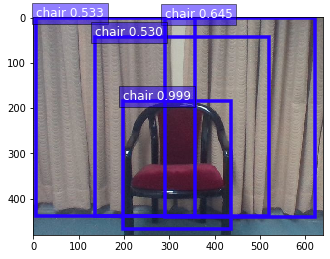

In [12]:
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [0]:
detections = []
for i in range(len(scores[0])):
  det = {}
  l = []
  if scores[0][i] >= 0.5:
    l = bounding_boxes[0][i].asnumpy().tolist()
    det["box_points"] = [ int(x) for x in l ]
    det["name"] = net.classes[int(class_IDs[0][i].asnumpy().tolist()[0])]
    det["score"] = scores[0][i].asnumpy().tolist()[0]
    detections.append(det)

In [0]:
# Make changes real time
marker =  detections[0]['box_points'][2] - detections[0]['box_points'][0] #chair see
focalLength = (marker * KNOWN_DISTANCE) / KNOWN_WIDTH['chair'] #chair see

In [0]:
def distance_to_camera(knownWidth, focalLength, perWidth):
	# compute and return the distance from the maker to the camera
	return (knownWidth * focalLength) / perWidth

In [0]:
im = Image.open('reference.jpg')
width, height = im.size

In [0]:
# Distance calculation function
def distance(lat1, lon1, lat2, lon2):
  # approximate radius of earth in km
  R = 6373.0

  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  distance = R * c

  # print("Result:", distance)
  return distance

In [18]:
# Lets begin
destination = input("Enter the address of the destination you want to go: ")

Enter the address of the destination you want to go: Tata Sports Complex, Kharagpur, Kharagpur-I, Paschim Medinipur, West Bengal, 721302, India


In [0]:
# Get destination coordinates
destination_url = "https://nominatim.openstreetmap.org/search?q=" + destination + "&format=json&polygon=1&addressdetails=1"
r = requests.get(url = destination_url)
d = r.json() 
destination_lat = d[0]['lat']
destination_lon = d[0]['lon']

In [0]:
destination_lat = '22.316753'
destination_lon = '87.308747'

In [0]:
# Get current coordinates
def current_position():
  f = open("/content/drive/My Drive/coordinates.txt", "r")
  d = f.read()
  l = d.split(sep = ",")
  current_lat = l[0]
  current_lon = l[1]
  f.close()
  return current_lat, current_lon

In [0]:
current_lat, current_lon = current_position()

In [0]:
# Get route
route_url = 'http://router.project-osrm.org/route/v1/car/' + current_lon + ',' + current_lat + ";" + destination_lon + ',' + destination_lat + '?alternatives=false&steps=true&overview=false'
r = requests.get(url = route_url) 
data_route = r.json() 

In [35]:
data_route

{'code': 'Ok',
 'routes': [{'distance': 347,
   'duration': 44.5,
   'legs': [{'distance': 347,
     'duration': 44.5,
     'steps': [{'distance': 347,
       'driving_side': 'left',
       'duration': 44.5,
       'geometry': 'y|egCcc|sOv@`LXxF',
       'intersections': [{'bearings': [262],
         'entry': [True],
         'location': [87.312019, 22.317733],
         'out': 0},
        {'bearings': [0, 75, 180, 270],
         'entry': [True, False, True, True],
         'in': 1,
         'location': [87.309929, 22.317453],
         'out': 3}],
       'maneuver': {'bearing_after': 262,
        'bearing_before': 0,
        'location': [87.312019, 22.317733],
        'modifier': 'left',
        'type': 'depart'},
       'mode': 'driving',
       'name': 'Aroeshir Dalal Avenue',
       'weight': 44.6},
      {'distance': 0,
       'driving_side': 'left',
       'duration': 0,
       'geometry': 'gzegCgn{sO',
       'intersections': [{'bearings': [83],
         'entry': [True],
         

In [36]:
 steps = len(data_route['routes'][0]['legs'][0]['steps'])
 print(steps)

2


In [37]:
data_route['routes'][0]['legs'][0]['steps'][0]

{'distance': 347,
 'driving_side': 'left',
 'duration': 44.5,
 'geometry': 'y|egCcc|sOv@`LXxF',
 'intersections': [{'bearings': [262],
   'entry': [True],
   'location': [87.312019, 22.317733],
   'out': 0},
  {'bearings': [0, 75, 180, 270],
   'entry': [True, False, True, True],
   'in': 1,
   'location': [87.309929, 22.317453],
   'out': 3}],
 'maneuver': {'bearing_after': 262,
  'bearing_before': 0,
  'location': [87.312019, 22.317733],
  'modifier': 'left',
  'type': 'depart'},
 'mode': 'driving',
 'name': 'Aroeshir Dalal Avenue',
 'weight': 44.6}

Continue straight for 72 meters


<IPython.core.display.Javascript object>

Saved to Testing1/photo0.jpg
No obstruction ahead. Move freely


KeyboardInterrupt: ignored

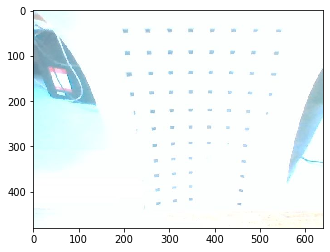

In [42]:
# Main loop
for k in range(steps):
  current_lat, current_lon = current_position()
  lat1 = float(current_lat)
  lon1 = float(current_lon)
  lat2 = data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['location'][1]
  lon2 = data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['location'][0]
  dis = int(1000*distance(lat1, lon1, lat2, lon2))
  print("Continue straight for", dis, "meters")
  # Put audio here
  message0 = "Continue straight for " + str(dis) + " meters"
  tts = gTTS(message0) #Provide the string to convert to speech
  tts.save('1.wav') #save the string converted to speech as a .wav file
  sound_file = '1.wav'
  display(Audio(sound_file, autoplay=True))
  # Put sleep here
  # time.sleep(1)
  counter = 0
  while True:
    # Clicking photo
    try:
      filename = take_photo('Testing1/photo{0}.jpg'.format(counter))
      print('Saved to {}'.format(filename))
    except Exception as err:
      print(str(err))
  
    # Running object detection
    x, img = data.transforms.presets.ssd.load_test("Testing1/photo{0}.jpg".format(counter), short = 480)
    class_IDs, scores, bounding_boxes = net(x)
  
    ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                           class_IDs[0], class_names=net.classes)
    plt.savefig("Testing2/output{0}.jpg".format(counter), bbox_inches='tight', pad_inches=0)

    detections = []
    for i in range(len(scores[0])):
      det = {}
      l = []
      if scores[0][i] >= 0.5:
        l = bounding_boxes[0][i].asnumpy().tolist()
        det["box_points"] = [ int(x) for x in l ]
        det["name"] = net.classes[int(class_IDs[0][i].asnumpy().tolist()[0])]
        det["score"] = scores[0][i].asnumpy().tolist()[0]
        detections.append(det)
  
    # Calculating distances of all objects
    for i in detections:
      marker = i['box_points'][2] - i['box_points'][0]
      object = i['name']
      try:
        inches = distance_to_camera(KNOWN_WIDTH[object], focalLength, marker)
      except KeyError:
        inches = distance_to_camera(KNOWN_WIDTH['others'], focalLength, marker)
      i['distance'] = inches
  
    #Sorting the list based on distance
    detections = sorted(detections, key=lambda k: k['distance'])

    message = ""
    if len(detections) == 0:
      message += "No obstruction ahead. Move freely"
      # have to add sleep here
      print(message)
      tts = gTTS(message) #Provide the string to convert to speech
      tts.save('1.wav') #save the string converted to speech as a .wav file
      sound_file = '1.wav'
      display(Audio(sound_file, autoplay=True))
      time.sleep(8)
    elif detections[0]['distance'] > 48.0:
      message += "Your nearest object is a " + str(detections[0]['name']) + ". and it is " + str(round(detections[0]['distance'])) + " inches away from you. Till then move freely"
      print(message)
      tts = gTTS(message) #Provide the string to convert to speech
      tts.save('1.wav') #save the string converted to speech as a .wav file
      sound_file = '1.wav'
      display(Audio(sound_file, autoplay=True))
      time.sleep(11)
      # time.sleep((round(detections[0]['distance'])-60)//12)
    else:
      for i in range(len(detections)):
        if (detections[i]['distance'] <= 48.0):
          if (detections[i]['box_points'][0] > width//3 and detections[i]['box_points'][2] < width*2//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards centre, "
          elif (detections[i]['box_points'][0] < width//3 and detections[i]['box_points'][2] > width*2//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards centre, "
          elif (detections[i]['box_points'][0] < width//3 and detections[i]['box_points'][2] < width//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards left, "
          elif (detections[i]['box_points'][0] > width*2//3 and detections[i]['box_points'][2] > width*2//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards right, "
          elif (detections[i]['box_points'][0] < width//3 and detections[i]['box_points'][2] < width*2//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards central left, "
          elif (detections[i]['box_points'][0] > width//3 and detections[i]['box_points'][2] > width*2//3):
            message += str(detections[i]['name']) + " is " + str(round(detections[i]['distance'])) + " inches away from you towards central right, "
        else:
          break
      free = [0]*655
      for i in range(len(detections)): 
        if detections[i]["distance"] <= 48.0:
          l = detections[i]['box_points'][0]
          r = detections[i]['box_points'][2]
          for j in range(l, r):
            free[j] = 1
        else:
          break  
      c = 0
      maxi = 0
      for i in range(len(free)):
        if free[i] == 0:
          c += 1
        elif maxi < c:
          maxi = c
          right = i
          c = 0
        else:
          c = 0
      left = right - maxi

      if maxi >= 213:
        # print("You shall pass")
        centre = int((left + right)/2)
        if centre >= 106 and centre <= 191:
          message += "You can move towards left"
          # print("You can move towards left")
        elif centre >= 448 and centre <= 533:
          message += "You can move towards right"
          # print("You can move towards right")
        elif centre >= 191 and centre <= 276:
          message += "You can move towards centre left"
          # print("You can move towards centre left")
        elif centre >= 276 and centre <= 361:
          message += "You can move towards centre"
          #  print("You can move towards centre")
        elif centre >= 361 and centre <= 448:
          message += "You can move towards centre right"
          #  print("You can move towards centre right")
      else:
        left_rotate = True
        right_rotate = True
        for i in range(140):
          if free[i] == 1:
            left_rotate = False
        for i in range(500, 640):
          if free[i] == 1:
            right_rotate = False
        if left_rotate == True and right_rotate == False:
          # print("No space. Try rotating the camera to a little left")
          message += "No space. Try rotating the camera to a little left"
        elif left_rotate == False and right_rotate == True:
          # print("No space. Try rotating the camera to a little right")
          message += "No space. Try rotating the camera to a little right"
        elif left_rotate == True and right_rotate == True:
          # print("No space. Try rotating the camera to a little left or right")
          message += "No space. Try rotating the camera to a little left or right"
        else:
          # print("No space. Try moving a step backwards")
          message += "No space. Try moving a step backwards"
      print(message)
      plt.show()
      tts = gTTS(message) #Provide the string to convert to speech
      tts.save('1.wav') #save the string converted to speech as a .wav file
      sound_file = '1.wav'
      display(Audio(sound_file, autoplay=True))
      duration = len(message)
      time.sleep(duration//16)
      time.sleep(5)

    # Get current position
    current_lat, current_lon = current_position()
    lat1 = float(current_lat)
    lon1 = float(current_lon)
    lat2 = data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['location'][1]
    lon2 = data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['location'][0]
  
    # Calculate distance
    dist = int(1000*distance(lat1, lon1, lat2, lon2))

    if dist <= 5:
      print("In", str(dist), "meters. Turn", data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['modifier'])
      # Put audio here
      message2 = "In " + str(dist) + " meters. Turn " + data_route['routes'][0]['legs'][0]['steps'][k]['maneuver']['modifier']
      tts = gTTS(message2) #Provide the string to convert to speech
      tts.save('1.wav') #save the string converted to speech as a .wav file
      sound_file = '1.wav'
      display(Audio(sound_file, autoplay=True))
      time.sleep(1)
      break

    # Incrementing counter
    counter += 1

In [39]:
dist

72